In [6]:
%matplotlib inline


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
city_data_to_load= "C:/Users/KerwinH/Documents/Data Analytics/Homework/Homework5/city_data.csv"
ride_data_to_load="C:/Users/KerwinH/Documents/Data Analytics/Homework/Homework5/ride_data.csv"

In [9]:
city_data=pd.read_csv("city_data.csv")
ride_data=pd.read_csv("ride_data.csv")

In [10]:
# Three Observable Trends
#1. The cost for taking a ride sharing service like Uber or Lyft is most expensive in urban areas and least expensive in rural areas
#2. There seems to be a greater need for ridesharing services in urban areas. A noticeable trend is the cost and number of drivers increases as the need increases. 
#3. As the total number of rides per city decreases, the average fare increases


In [11]:
pyber=pd.merge(city_data, ride_data, how="outer", on=["city"])
pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


In [12]:
city_type= city_data.set_index("city")["type"]

In [13]:
average_fare= pyber.groupby(['city']).mean()['fare']


In [14]:
total_rides=pyber.groupby(['city']).count()['ride_id']

In [15]:
Total_drivers=pyber.groupby(['city']).count()['driver_count']

In [16]:
Rideshare=pd.DataFrame({"Average fare": average_fare, "Total Rides Per City": total_rides, "Total number of drivers": Total_drivers, "Type of City": city_type })

In [17]:
urban=Rideshare[Rideshare['Type of City']=='Urban']
rural=Rideshare[Rideshare['Type of City']=='Rural']
Suburban=Rideshare[Rideshare['Type of City']=='Suburban']

In [18]:
colors_schemes={'Urban': ['gold'], 'Suburban': ['lightskyblue'], 'Rural': ['lightcoral']}

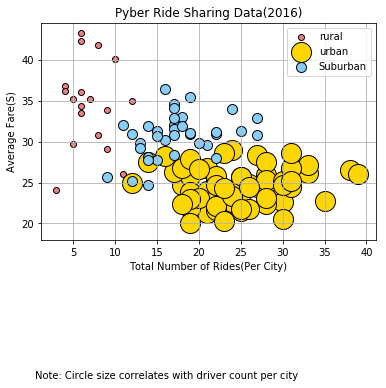

In [19]:
plt.scatter(rural['Total Rides Per City'], rural['Average fare'], edgecolor='black', color='lightcoral', label='rural')
plt.scatter(urban['Total Rides Per City'], urban['Average fare'],edgecolor='black',s =400, color='gold', label='urban')
plt.scatter(Suburban['Total Rides Per City'], Suburban['Average fare'],edgecolor='black', s=100, color='lightskyblue', label='Suburban')
plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare(S)')
plt.legend(loc='best')
plt.text(0.5,1,'Note: Circle size correlates with driver count per city')
plt.grid()
plt.show()


In [20]:
Total_fares=pyber.groupby(['city']).sum()['fare']

In [40]:
labels=["Rural", "Suburban", "Urban"]

In [41]:
sizes=[6, 30, 50]

In [42]:
explode=(0, 0, 0.1)

In [43]:
colors=["gold", "lightskyblue","lightcoral"]

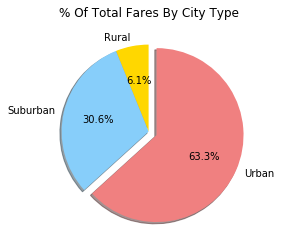

In [44]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct = "%1.1f%%", shadow = True, startangle=90)
plt.title("% Of Total Fares By City Type")
plt.show()

In [45]:
Ride_total=pyber.groupby(['type']).count()['ride_id']

In [46]:
labels=["Rural", "Suburban", "Urban"]

In [47]:
sizes=[6,27, 70]

In [48]:
explode=(0, 0, 0.1)

In [49]:
colors=["gold", "lightskyblue","lightcoral"]

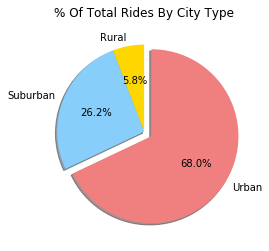

In [50]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct = "%1.1f%%", shadow = True, startangle=90)
plt.title("% Of Total Rides By City Type")
plt.show()

In [81]:
Drivers_total=pyber.groupby(['type']).sum()['driver_count']

In [82]:
labels=["Rural", "Suburban", "Urban"]

In [83]:
sizes=[2,16, 80]

In [84]:
explode=(0, 0.1, 0.1)

In [85]:
colors=["gold", "lightskyblue","lightcoral"]

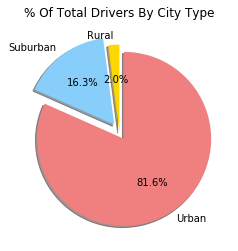

In [86]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct = "%1.1f%%", shadow = True, startangle=90 )
plt.title("% Of Total Drivers By City Type")
plt.show()